Goal
    - XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.
    
Hypothesis

    - As there are a variety ranges of cars in terms of their market price, we expect to see a few outliers for the expensive/high-end cars or even the cheaper/low-end cars.
    - We know that the majority of the population has an age range of roughly 20 to 40 years old. We expect to see the most amount of data at this age group.
    - We expect to see similar applications to the income groups as the we expect incomes towards a potential bell curve distribution to have the most amount of usage of cabs.
    - We expect their to be a higher amount of cab usage during the colder months of the year as people may tend to prefer said method of travel to avoid the cold.
    - We expect to see a profit rate that is identical to the bell curve distribution for kilometers traveled. 
    - We expect to see more cab usage in the largest cities in America.
    - Continuation, as there are more cab usage in the largest cities, we expect to see a higher amount of profit.
    

In [46]:
# Libaries
import numpy as np
import pandas as pd
%pip install seaborn
import seaborn as sb
import xlrd
%pip install tabulate
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# DataSets
cab = pd.read_csv("Cab_Data.csv") 
city = pd.read_csv("City.csv") 
customer = pd.read_csv("Customer_ID.csv") 
transaction = pd.read_csv("Transaction_ID.csv") 

In [4]:
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [5]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 16.5+ MB


In [6]:
cab.shape

(359392, 7)

In [7]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [8]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [9]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 312.0+ bytes


In [10]:
city['Users'] = city['Users'].replace('"', '')
city['Population'] = city['Population'].replace('"', '')

city['Users'] = city['Users'].replace(',', '', regex=True).astype(int)
city['Population'] = city['Population'].replace(',', '', regex=True).astype(int)

city['User %'] = (city['Users'] / 
                  city['Users'].sum()) * 100

city.shape

(20, 4)

In [11]:
city.isnull().sum()

users_city = pd.DataFrame(city.groupby("City")["Users"].sum().sort_values(ascending=False))
users_city.reset_index(inplace=True)


In [12]:
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


In [14]:
customer.shape

(49171, 4)

In [15]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [16]:
transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [17]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 8.4+ MB


In [18]:
transaction.shape

(440098, 3)

In [19]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Text(0.5, 1.0, 'Yellow Cab')

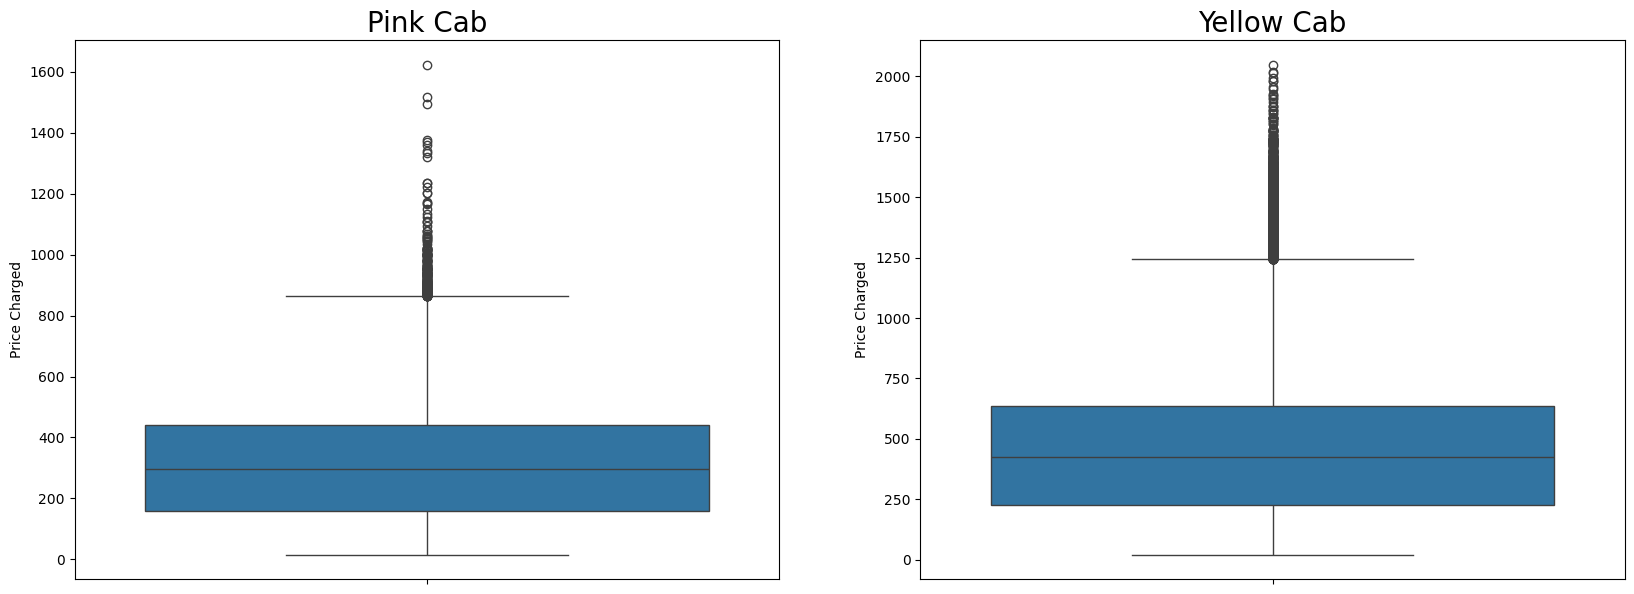

In [43]:
# Testing for outliers

PinkCab = cab[cab['Company']=='Pink Cab']
YellowCab = cab[cab['Company']=='Yellow Cab']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sb.boxplot(PinkCab['Price Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sb.boxplot(YellowCab['Price Charged'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)

# We see a higher range for the yellow cab company than the pink cab company. The outliers we see may be due to high end cars and their scarcity. These outliers will be ignored.

In [20]:
# Merging transcation, cab, and customer data sets together
merge1 = pd.merge(transaction, cab, on=["Transaction ID"])
merged_data = pd.merge(merge1, customer, on=["Customer ID"])
merged_data['Profit']=merged_data['Price Charged']-merged_data['Cost of Trip']

merged_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600


In [21]:
merged_data.shape

(359392, 13)

In [22]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Date of Travel      359392 non-null  int64  
 4   Company             359392 non-null  object 
 5   City                359392 non-null  object 
 6   KM Travelled        359392 non-null  float64
 7   Price Charged       359392 non-null  float64
 8   Cost of Trip        359392 non-null  float64
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Profit              359392 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 32.9+ MB


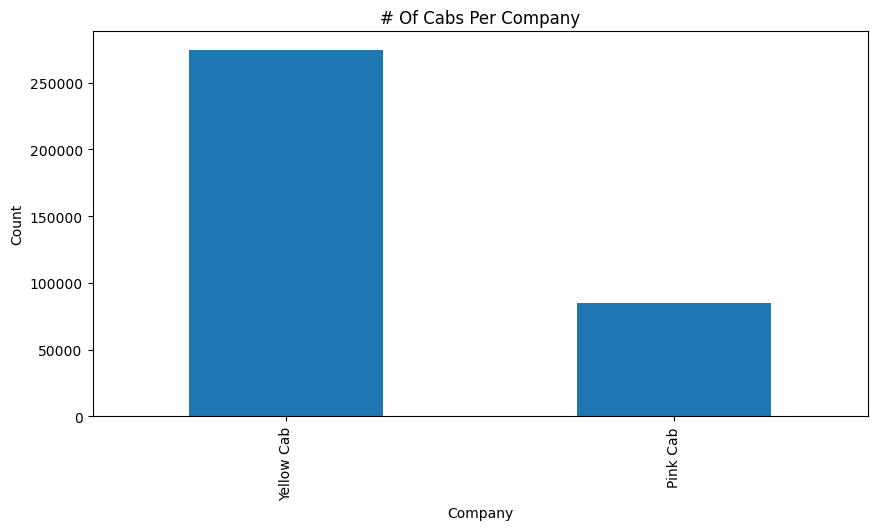

In [23]:
## Start of Analysis

# Number of cabs for each company
plt.figure(figsize=(10,5))
merged_data['Company'].value_counts().plot(kind='bar')
plt.title("# Of Cabs Per Company")
plt.xlabel("Company")
plt.ylabel("Count")
plt.show()

# We see that the yellow cab company has a signficantly higher count than pink cab company.

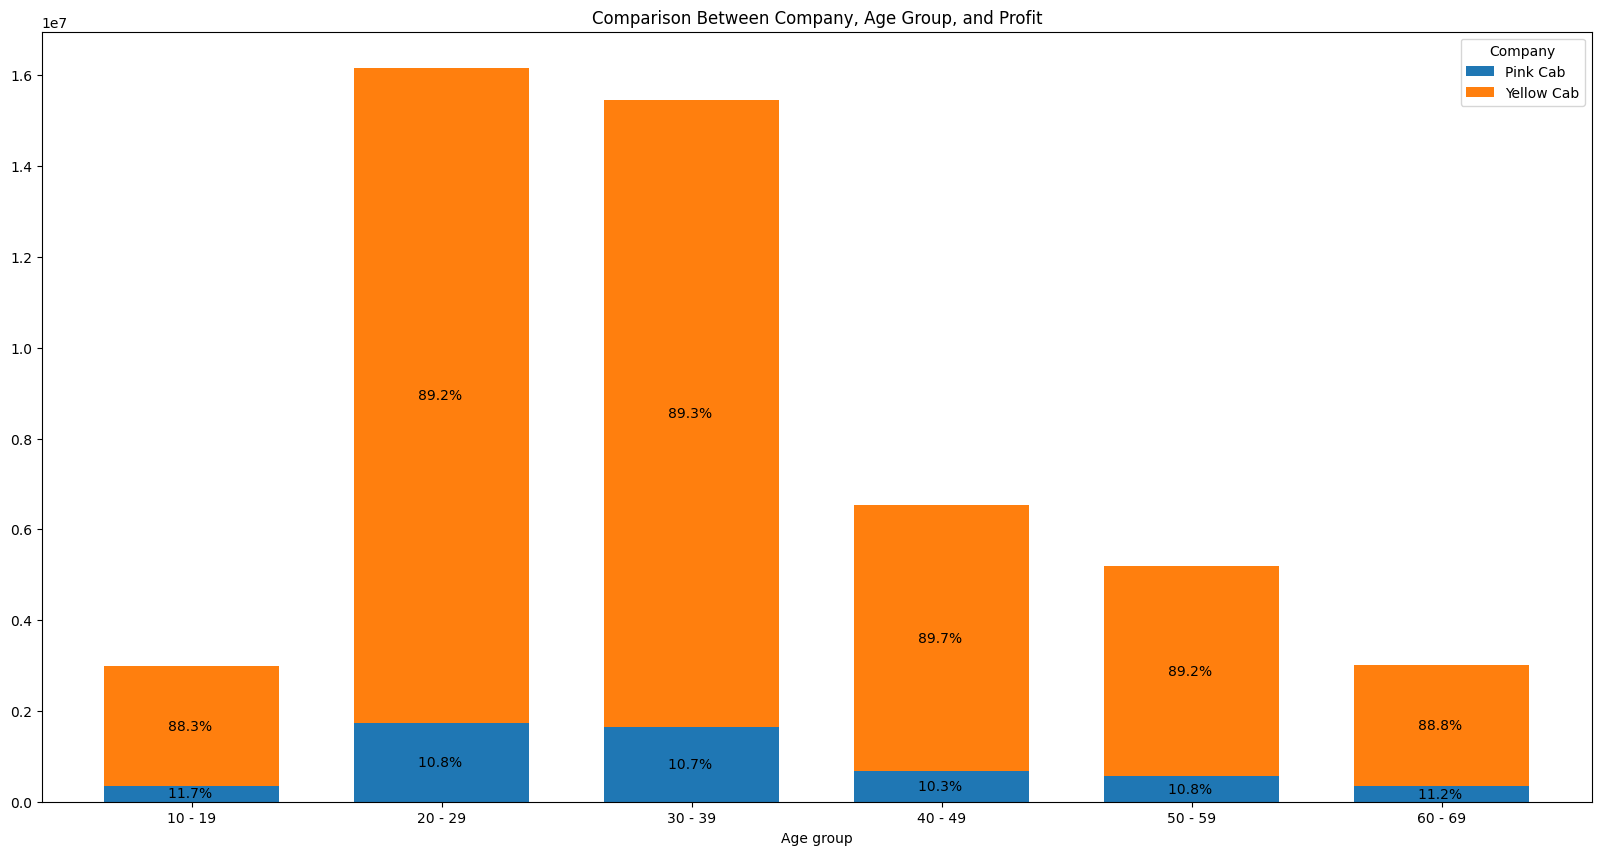

In [24]:
# Comparion between company, age group, and profit

# Plot Parameters
def plot_figure1(pivot_table, title, xpos, x, y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.bar(stacked=True, figsize=(x, y), width=0.7)
    plt.xticks(rotation=0)  # Moved rotation directly into plt.xticks
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if j == 0 and pivot_table.loc[i][j] < 10 and pivot_table.loc[i][j] < sum(pivot_table.loc[i]):
                label = ""
            else:
                label = f"{round((pivot_table.loc[i][j] / sum(pivot_table.loc[i])) * 100, 1)}% "
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()
            
            # Modified condition to use xpos parameter
            if width > xpos: 
                ax.text(x + width / 2, y + height / 2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height / 2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

# Calculating Profit (Price - Cost)
merged_data['Profit'] = merged_data['Price Charged'] - merged_data['Cost of Trip']
labels = [f"{i} - {i + 9}" for i in range(10, 70, 10)]
merged_data["Age group"] = pd.cut(merged_data.Age, range(10, 75, 10), right=False, labels=labels)
age_profit_company_graph = merged_data.pivot_table(index=["Age group"], columns='Company', values='Profit', aggfunc='sum')
plot_figure1(age_profit_company_graph, "Comparison Between Company, Age Group, and Profit", 0.45, 20, 10)

# We see that the yellow cab company makes nearly 90% of the profit regardless of age when compared to the pink cab company.

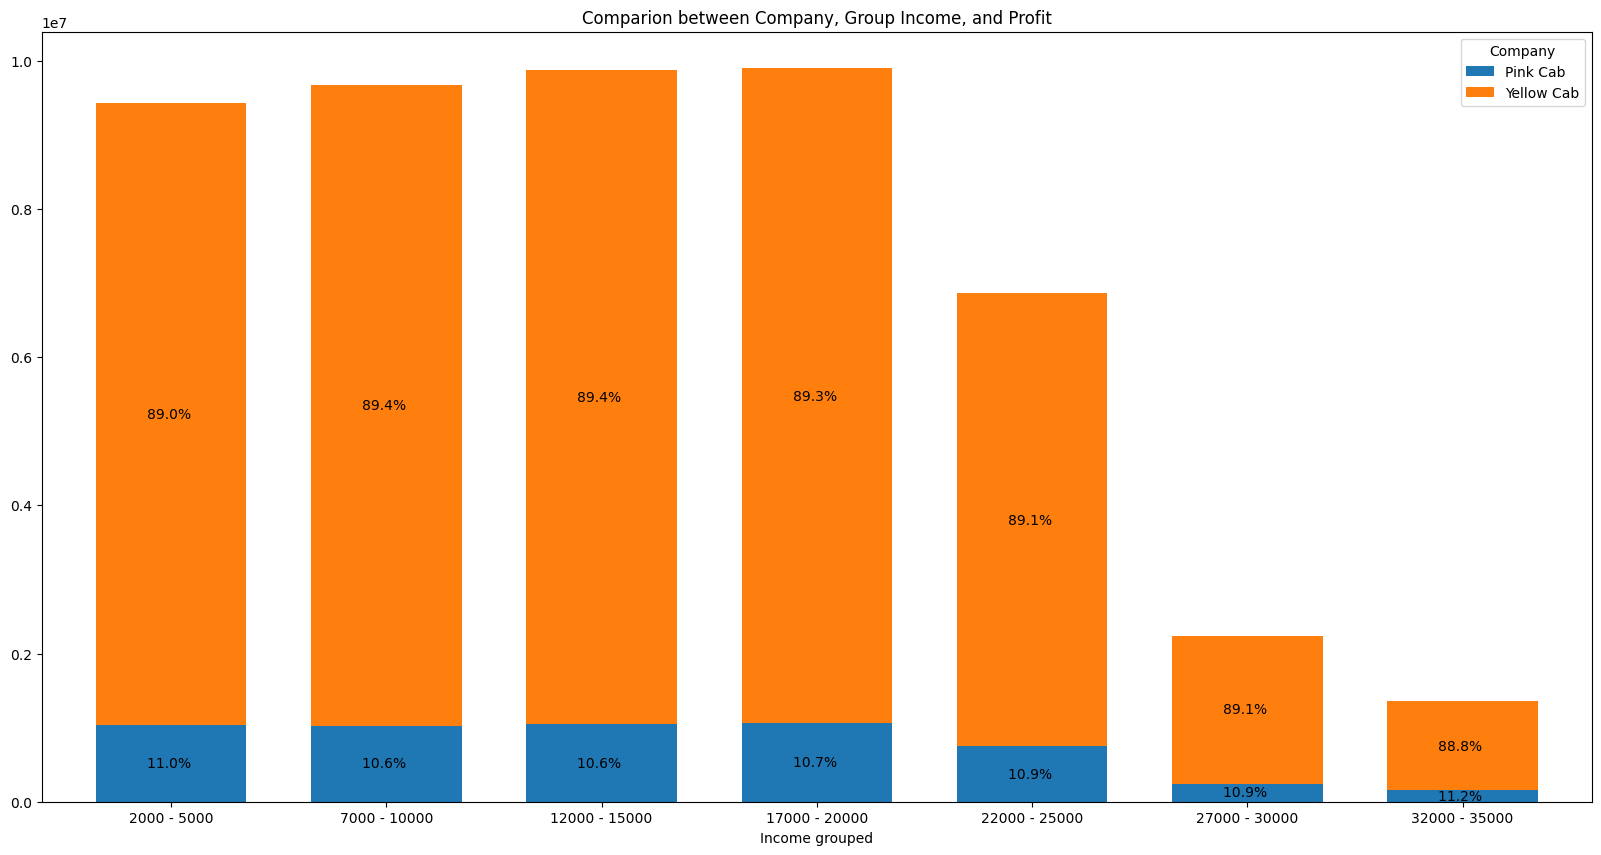

In [25]:
# Similarly, Comparion between company, group income, and profit

labels2 = ["{0} - {1}".format(i, i + 3000) for i in range(2000, 35000, 5000)]
merged_data["Income grouped"] = pd.cut(merged_data['Income (USD/Month)'], range(2000,40000, 5000), right=False, labels=labels2)

groupincome_profit_company_graph = merged_data.pivot_table(index = ["Income grouped"], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure1(groupincome_profit_company_graph, "Comparion between Company, Group Income, and Profit", 0.45,20,10)

# We achieve similar results to the previous plot. We see that the yellow cab company makes nearly 90% of the profit regardless of group income when compared to the pink cab company.

<AxesSubplot:title={'center':' Average Profit for Each Company '}, ylabel='Profit'>

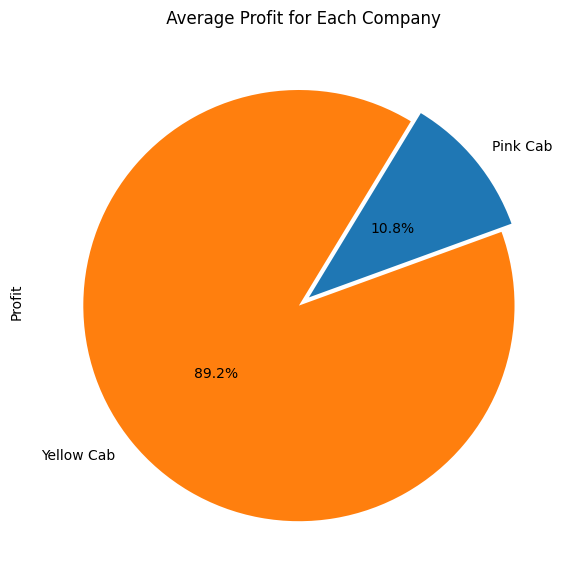

In [26]:
# Average profit
plt.title(" Average Profit for Each Company ")
merged_data.groupby('Company')['Profit'].sum().plot(kind='pie',y='Company',startangle=20,figsize=(15,7),autopct='%1.1f%%',explode=[0.03]*2,pctdistance=0.5)

# We wanted to see the exact average of profit for each company. We see that the yellow cab company makes 89.2% average profit compared to the pink cab company.

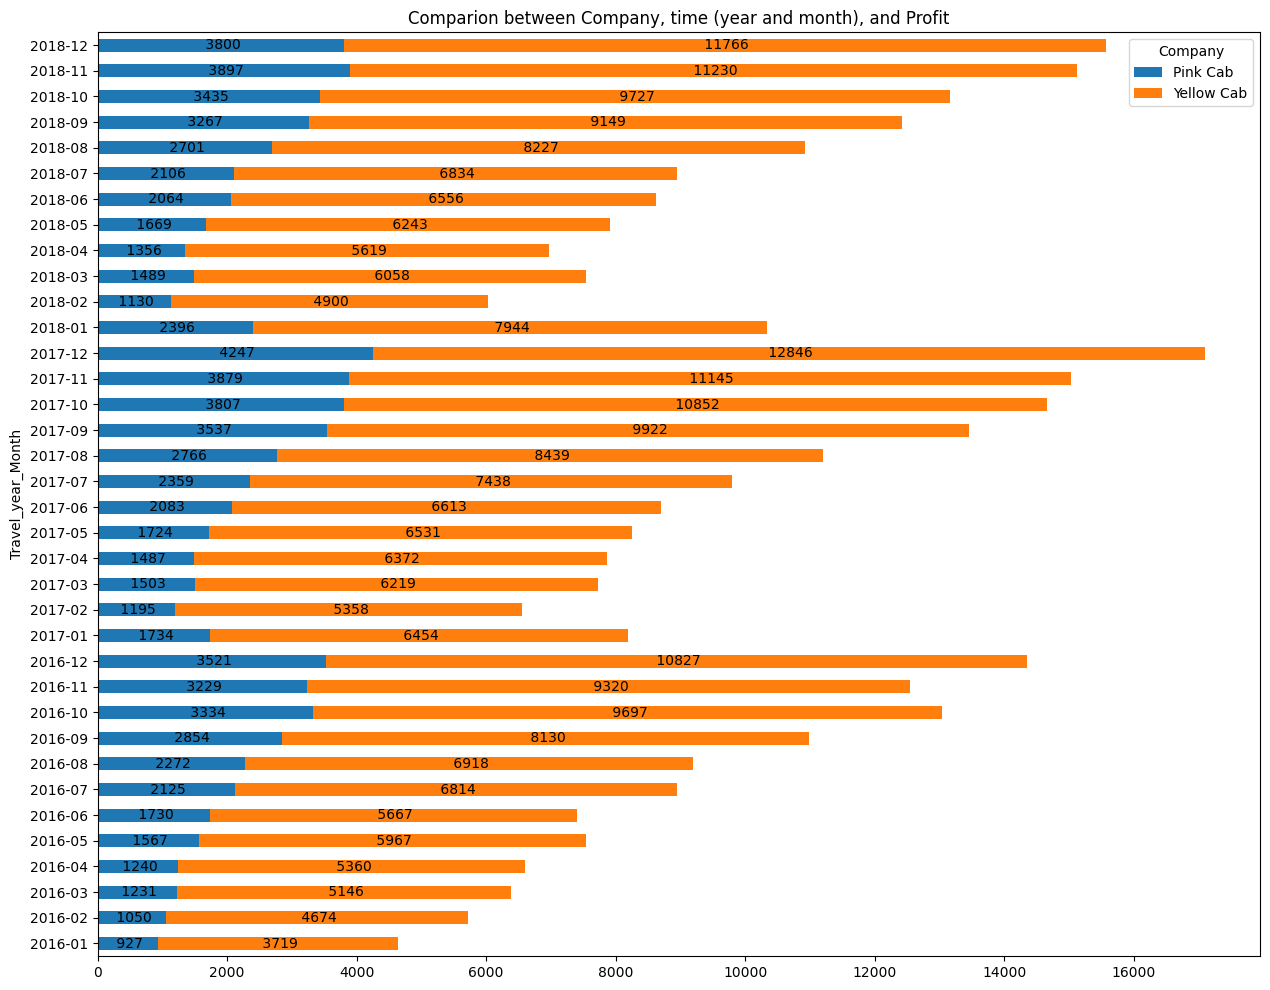

In [27]:
# Number of profit for each company when looking at year and month

merged_data['Date of Travel'] = merged_data['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
merged_data['Travel_year_Month'] = pd.to_datetime(merged_data['Date of Travel']).dt.to_period('M')

# Similarly, plot parameters
def plot_figure2(pivot_table, title, xpos,x,y):
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))

    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label =  " " + str(pivot_table.loc[i][j].astype('int64')) + ""
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()
    
time_profit_company_graph = merged_data.pivot_table(index = ['Travel_year_Month'], columns = 'Company', values = 'Profit', aggfunc = 'count')
plot_figure2(time_profit_company_graph, "Comparion between Company, time (year and month), and Profit",15,15,12)

# We see that regardless of the year or month, the yellow cab company surpasses the amount of profit for the pink cab company
# It is worth noting the the patterns in months. We see that there is a higher amount of profit towards the end of the year for both companies.

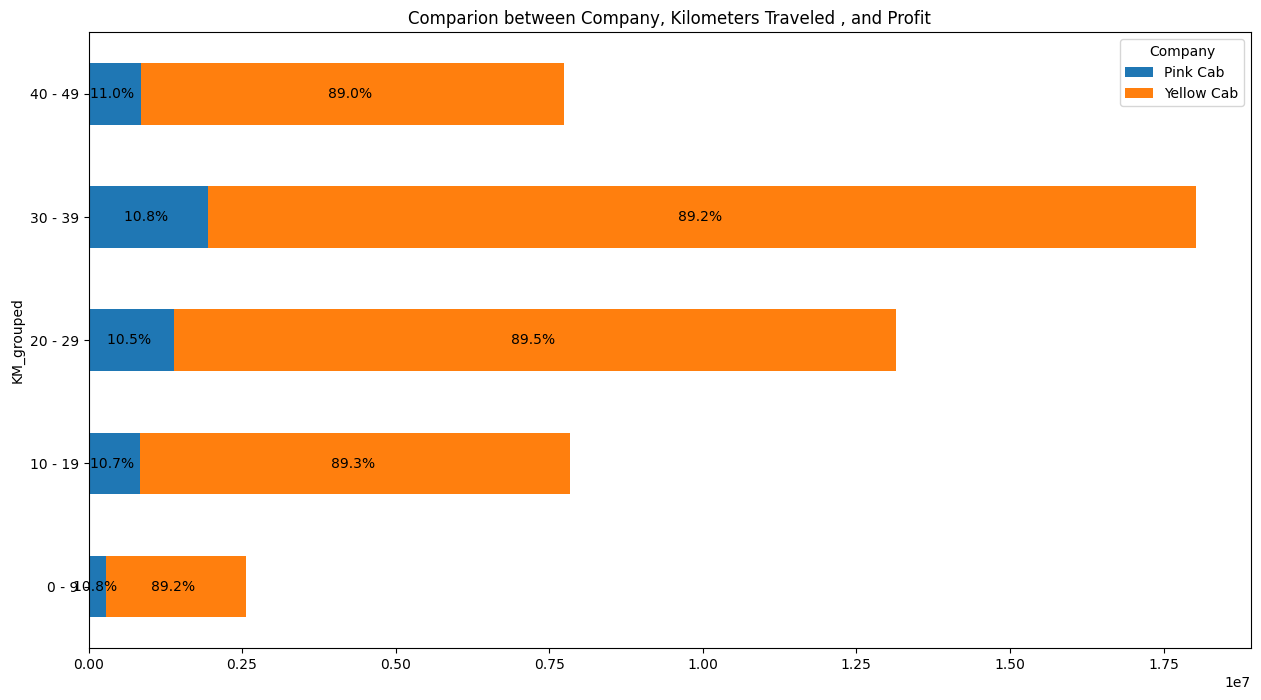

In [28]:
# Comparion between company, kilometers traveled , and profit

# Similarly, plot parameters
def plot_figure3(pivot_table, title, xpos,x,y):
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()
    
label = ["{0} - {1}".format(i, i + 9) for i in range(0, 50, 10)]
merged_data["KM_grouped"] = pd.cut(merged_data['KM Travelled'], range(0,55, 10), right=False, labels=label)
company_KM_profit_graph = merged_data.pivot_table(index = ['KM_grouped'], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure3(company_KM_profit_graph, "Comparion between Company, Kilometers Traveled , and Profit",10,15,8)

# We see that again, the yellow cab company makes nearly 89% to 90% of the profit compared to the pink cab company regardless of kilometers traveled.

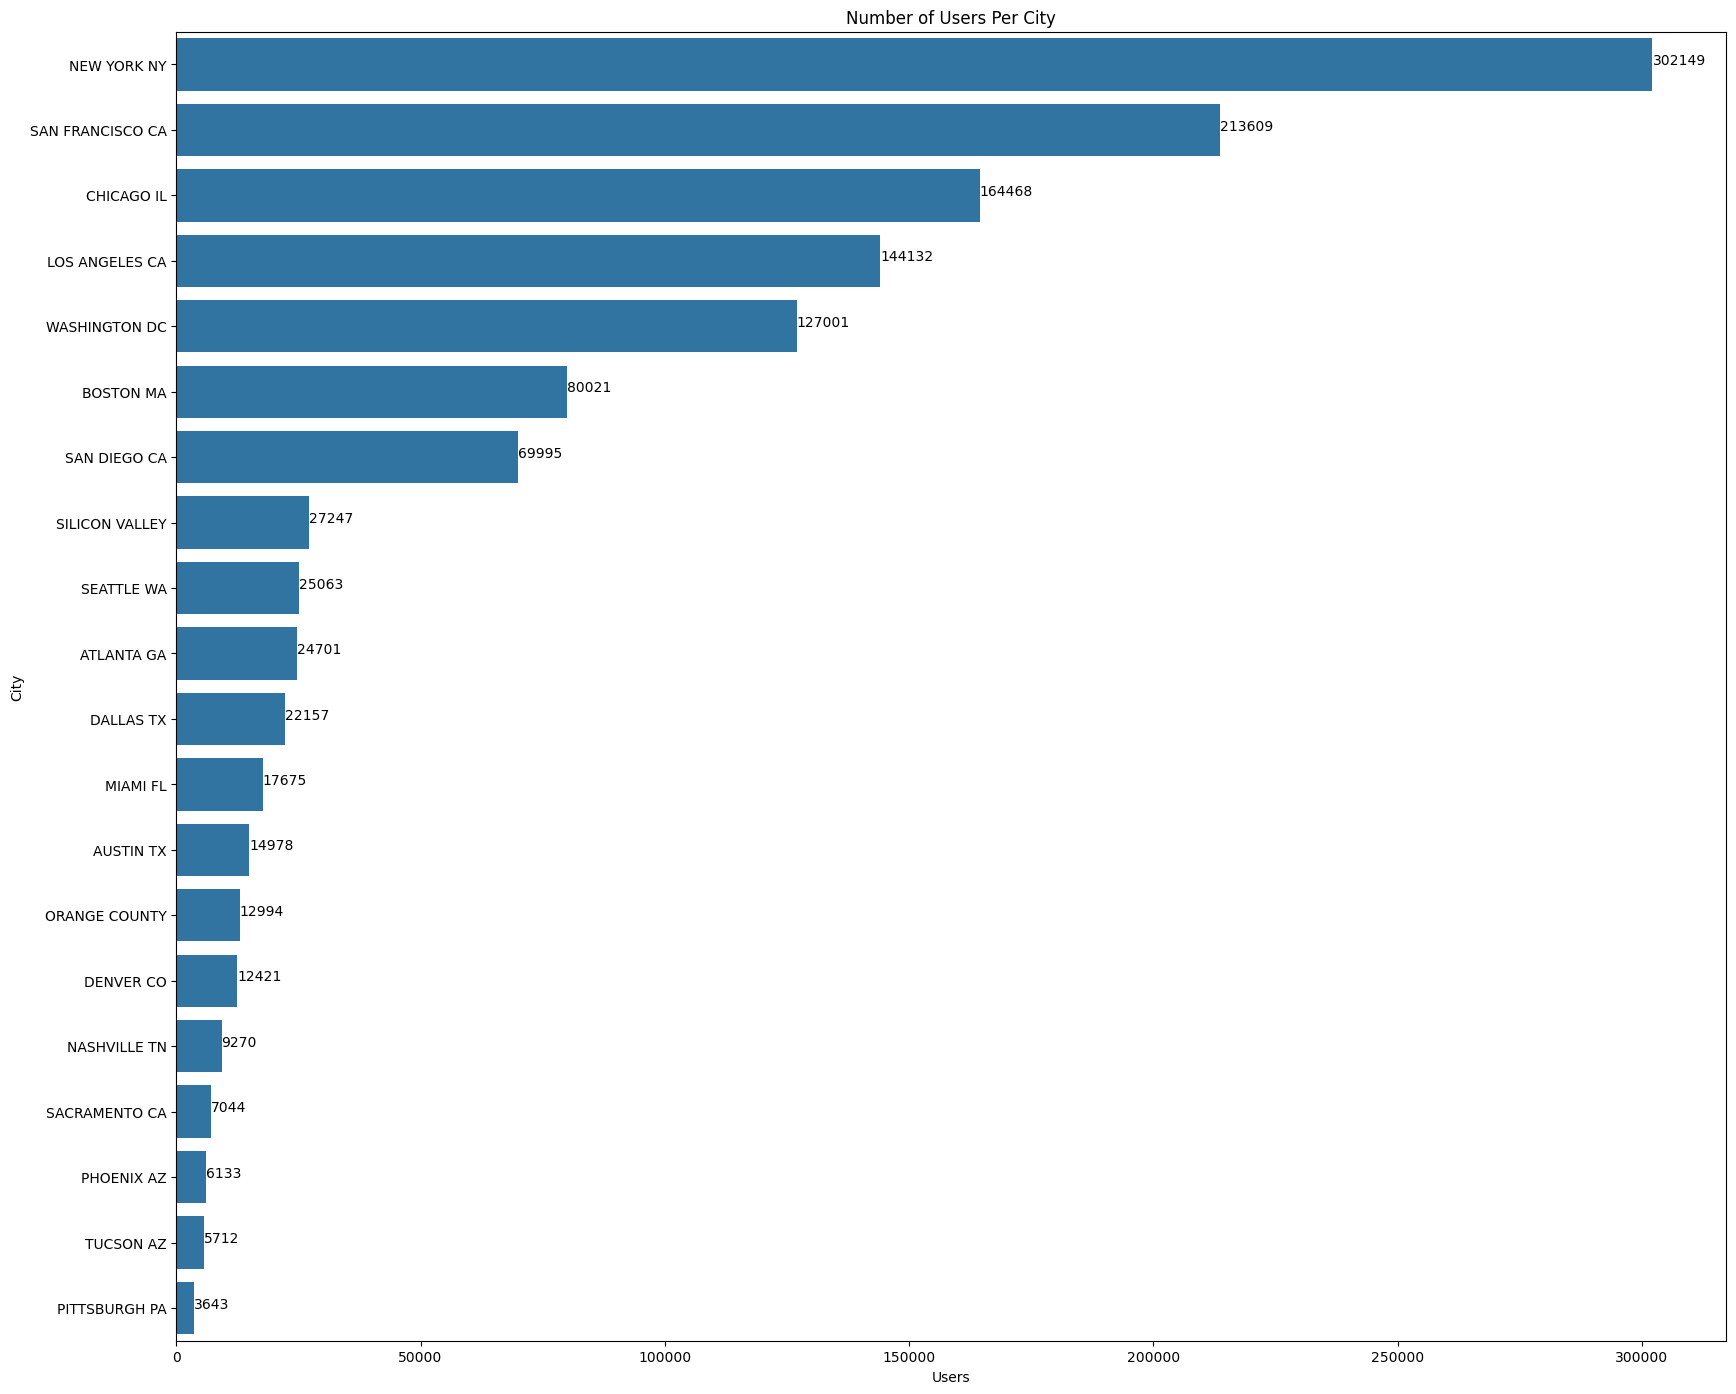

In [29]:
# Number of uses per city

uses_city = pd.DataFrame(city.groupby("City")["Users"].sum().sort_values(ascending=False))
uses_city.reset_index(inplace=True)

plt.figure(figsize=(20, 17));
g=sb.barplot(x="Users", y="City", data=uses_city);
for i, v in enumerate(uses_city.Users):
    g.text(v, i, str(int(v)))
plt.title('Number of Users Per City');

# We see that New York, San Fransisco, Chicago, Los Angeles, and Washington DC make up the majority of pink and yellow cab company usage.

<AxesSubplot:ylabel='Profit'>

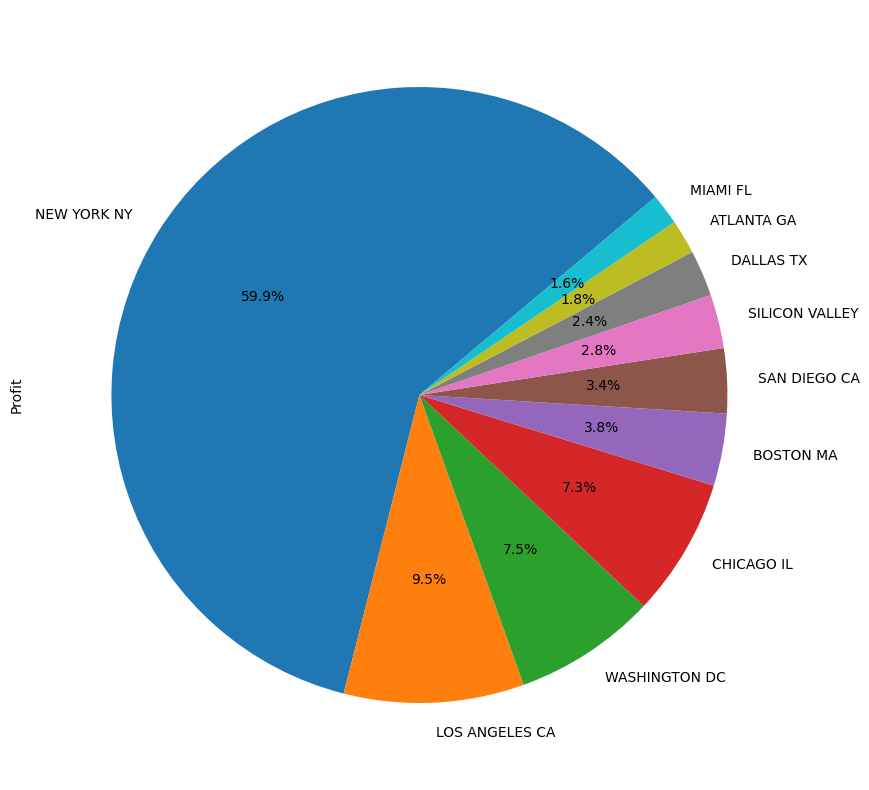

In [30]:
# Different perspective of each city vs amount of profit

merged_data.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,figsize=(15,10),autopct='%1.1f%%')

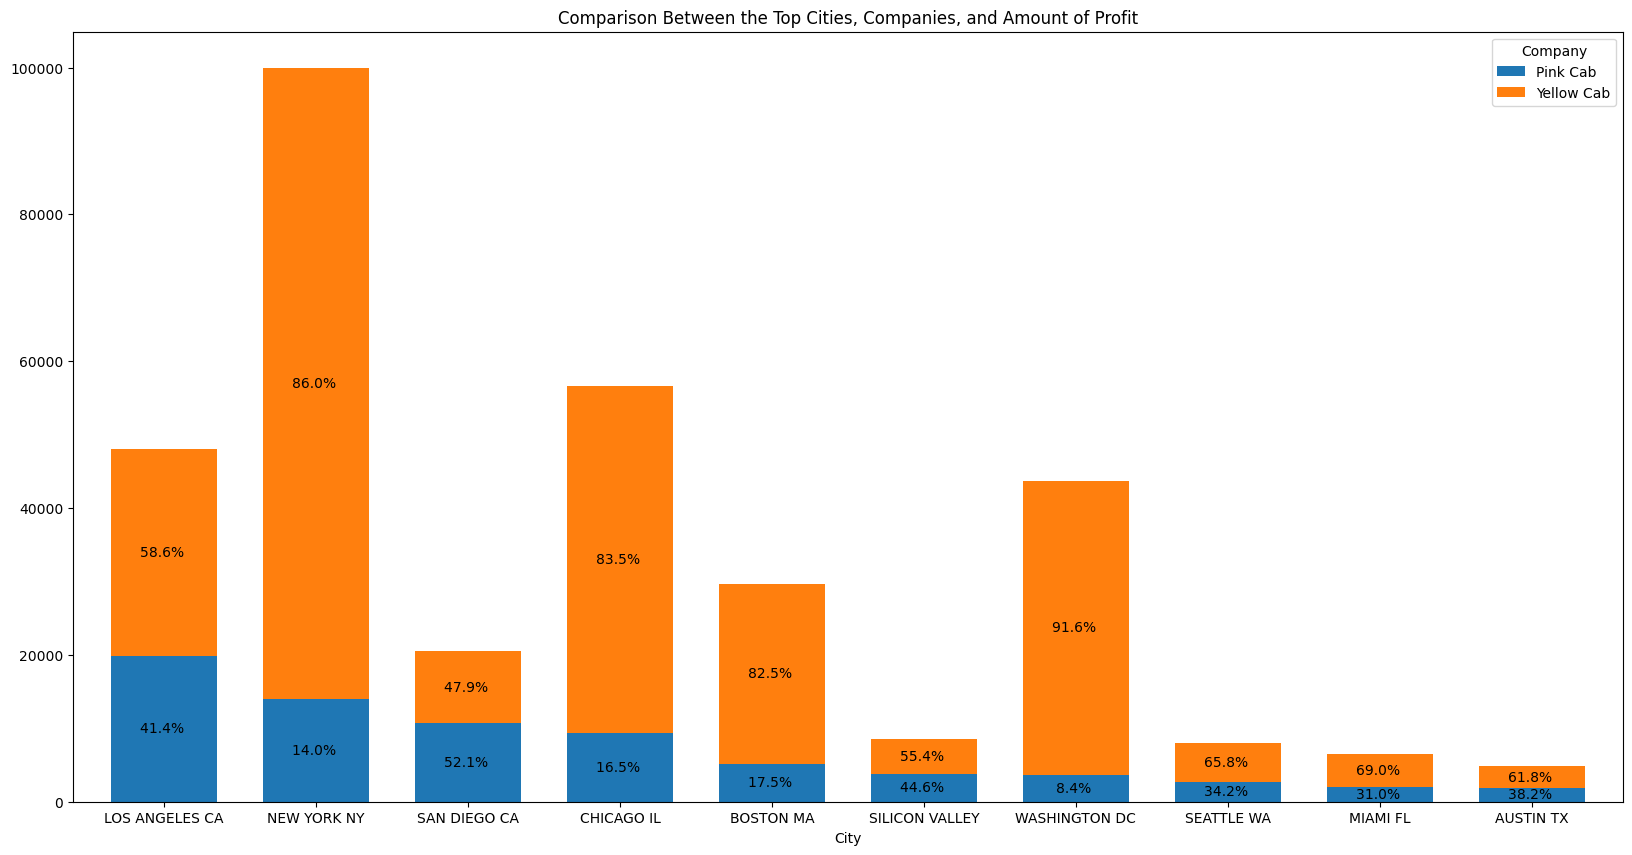

In [31]:
# Comparison between companies, cities, and profit.
city_profit = merged_data.pivot_table(index = ['City'], columns = 'Company', values = 'Profit', aggfunc = 'count')
company_city_profit_graph = city_profit.sort_values("Pink Cab", ascending = False).head(10)
plot_figure1(company_city_profit_graph, "Comparison Between the Top Cities, Companies, and Amount of Profit", 0.45, 20, 10)

In [51]:
# Comparison between companies, cities, and profit.

group1 = merged_data[merged_data['Company']=='Pink Cab']
group2 = merged_data[merged_data['Company']=='Yellow Cab']


# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between the groups.")

<class 'TypeError'>: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

In [52]:
# Comparison between companies, cities, and profit.


group2 


,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped,Travel_year_Month,KM_grouped
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000,2018-07,20 - 29
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000,2018-11,40 - 49
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000,2018-04,30 - 39
5,10324737,27703,Cash,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,50.8912,20 - 29,7000 - 10000,2018-05,0 - 9
8,10079404,28712,Card,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242,210.0920,50 - 59,7000 - 10000,2016-09,30 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000,2018-01,10 - 19
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000,2018-01,10 - 19
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000,2018-01,10 - 19
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000,2018-01,0 - 9


Reiterated Hypothesis

    - As there are a variety ranges of cars in terms of their market price, we expect to see a few outliers for the expensive/high-end cars or even the cheaper/low-end cars.
    - We know that the majority of the population has an age range of roughly 20 to 40 years old. We expect to see the most amount of data at this age group as a bell curve distribution
    - We expect to see similar applications to the income groups as the we expect incomes towards a potential bell curve distribution to have the most amount of usage of cabs.
    - We expect their to be a higher amount of cab usage during the colder months of the year as people may tend to prefer said method of travel to avoid the cold.
    - We expect to see a profit rate that is identical to the bell curve distribution for kilometers traveled. 
    - We expect to see more cab usage in the largest cities in America.
    - Continuation, as there are more cab usage in the largest cities, we expect to see a higher amount of profit.
    
Reiterated Goal

    - XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.
    


CONCLUSION

After comparing both cab companies to determine which company should the client invest in, we discovered that: 

    - We did see a few outliers which was ignored due to said outliers potentially being the high-end/expensive cars.
    - We saw that the yellow cab company has nearly three times the number of cabs when compared to the pink cab company.
    - We saw the greatest amount of data between the age range of 20 to 40 years old which corresponds with our bell curve distribution theory.
        - We also saw that the yellow cab company makes nearly 90% of the profit in all age groups when compared to the pink cab company.
    - For income groups, we saw a skewed (to the left) bell curve distribution, thus our theory was wrong in this regard.
        - Again, we saw that the yellow cab company makes nearly 90% of the profit in all age groups when compared to the pink cab company.
    - We calculated the average of profit between the two companies regarding age and income and achieved 89.2% profit for the yellow cab company and 10.8% for the pink cab company.
    - We see an exponential increase of cab usage towards the end of the years and the first month of the year which suggest that our hypothesis that people prefer to take the cab towards the colder months of the year.
        - We also see that the yellow cab company makes the majority of the profit throughout the year which is expected given our previous tests.
    - Our hypothesis about a bell curve distribution for kilometers traveled was partially correct. Although not a perfect bell curve, it still resembles the shape. 
        - As before and expected, we see nearly 90% of the profit towards the yellow cab company.
    - We were correct about more cab usage in the largest cities in America. New York, San Fransisco, Chicago, Los Angeles, and Washington DC make up the majority of pink and yellow cab company usage.
    - Look at the top 5 cities, surprisingly we see roughly equal profit in Los Angeles between the two companies.
        Unsurprisingly, we see a majority of profit going towards the yellow cab company for the other 4 cities.

We heavily encourge your firm to invest in the yellow cab company as the profits of the yellow cab company are signficiantly higher than the pink cab company. As we were given a three year sample, we also see that the yellow cab company has been stable and consistent with their profit throughout all the years. With that being said, our investigation leads to the yellow cab company being the winner.